In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
#
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
credit = pd.read_csv("C:\\bbk\predictiveanalytics\course2\DefaultedCreditCardClients.csv", skiprows=1)

In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [4]:
#copy the column with a long name and then rename the new column with a new name
credit['default'] = credit['default payment next month']

In [5]:
#remove unnecessary data that does not make any sense
credit = credit.drop(['ID', 'default payment next month'], axis=1)
#drop duplicates - always
credit = credit.drop_duplicates()
#check for the nulls
nulls = credit.isnull().sum()
nulls

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [6]:
credit.dtypes

LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default      object
dtype: object

In [7]:
credit['SEX'].describe()

count      29965
unique         2
top       female
freq       18091
Name: SEX, dtype: object

In [8]:
#Encode Sex values
# anything that is an object must be classified into a number, preferably binary values of 0 and 1s
le = LabelEncoder()
le.fit(credit['SEX'])
credit['SEX'] = le.transform(credit['SEX'])

In [9]:
credit['SEX'].describe()

count    29965.000000
mean         0.396262
std          0.489128
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: SEX, dtype: float64

In [10]:
credit['default'].describe()

count           29965
unique              2
top       not default
freq            23335
Name: default, dtype: object

In [11]:
#Encode default values
le = LabelEncoder()
le.fit(credit['default'])
credit['default'] = le.transform(credit['default'])

In [12]:
credit['MARRIAGE'].describe()

count    29965.000000
mean         1.551877
std          0.521997
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

In [13]:
credit.dtypes

LIMIT_BAL     int64
SEX           int32
EDUCATION    object
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int32
dtype: object

In [14]:
#Education is still an OBJECT
# Let's make it binary using ONE-HOT ENCODER feature called dummification
credit = pd.get_dummies(credit)

In [15]:
credit.dtypes
# Note that the original EDUCATION column is now replaced with binary valued columns towards the end of the dtype list

LIMIT_BAL                    int64
SEX                          int32
MARRIAGE                     int64
AGE                          int64
PAY_0                        int64
PAY_2                        int64
PAY_3                        int64
PAY_4                        int64
PAY_5                        int64
PAY_6                        int64
BILL_AMT1                    int64
BILL_AMT2                    int64
BILL_AMT3                    int64
BILL_AMT4                    int64
BILL_AMT5                    int64
BILL_AMT6                    int64
PAY_AMT1                     int64
PAY_AMT2                     int64
PAY_AMT3                     int64
PAY_AMT4                     int64
PAY_AMT5                     int64
PAY_AMT6                     int64
default                      int32
EDUCATION_graduate school    uint8
EDUCATION_high school        uint8
EDUCATION_other              uint8
EDUCATION_university         uint8
dtype: object

In [16]:
credit.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,-0.289438,51283.009778,49236.366294,4.706792e+04,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.352511,0.164025,0.015618,0.467846
std,129760.135222,0.489128,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,1.149090,73658.132403,71195.567392,6.937135e+04,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.477760,0.370304,0.123995,0.498973
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3595.000000,3010.000000,2.711000e+03,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22438.000000,21295.000000,2.013500e+04,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67260.000000,64109.000000,6.020100e+04,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Marriage is still an classification value. We should ONE-HOT ENCODE IT. assign it to a new variable
# Let's make it binary using ONE-HOT ENCODER feature called dummification
creditMarriage = pd.get_dummies(credit.MARRIAGE, prefix='Marriage')

In [18]:
#Now concatenate the new variable into our credit Dataframe using concat function
credit = pd.concat([credit, creditMarriage], axis=1)

In [19]:
credit = credit.drop(['MARRIAGE'], axis=1)

In [20]:
credit.describe()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,Marriage_0,Marriage_1,Marriage_2,Marriage_3
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,-0.289438,51283.009778,49236.366294,4.706792e+04,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.352511,0.164025,0.015618,0.467846,0.001802,0.455298,0.532121,0.010779
std,129760.135222,0.489128,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,1.149090,73658.132403,71195.567392,6.937135e+04,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.477760,0.370304,0.123995,0.498973,0.042414,0.498006,0.498976,0.103264
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3595.000000,3010.000000,2.711000e+03,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22438.000000,21295.000000,2.013500e+04,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,240000.000000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67260.000000,64109.000000,6.020100e+04,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1000000.000000,1.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'Marriage_0', 'Marriage_1', 'Marriage_2',
       'Marriage_3'],
      dtype='object')


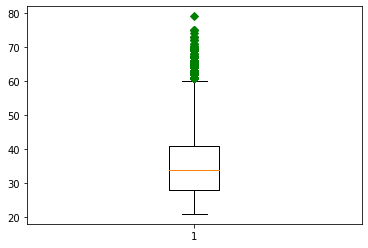

In [21]:
header = credit.dtypes.index
print(header)
#Next we'll  build a plot plot with one of the features in our data:
A = credit['AGE']
plt.boxplot(A,0,'gD')
plt.show()

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'Marriage_0', 'Marriage_1', 'Marriage_2',
       'Marriage_3'],
      dtype='object')


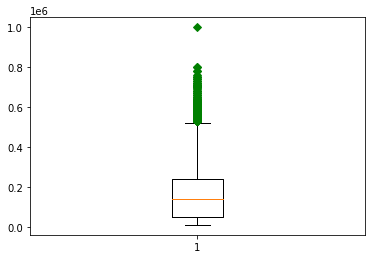

In [22]:
header = credit.dtypes.index
print(header)
#Next we'll  build a plot plot with one of the features in our data:
B = credit['LIMIT_BAL']
plt.boxplot(B,0,'gD')
plt.show()

In [23]:
#replace pay_X values of -2, -1 with zero
credit['PAY_0'] = credit['PAY_0'].replace(-2,0)
credit['PAY_2'] = credit['PAY_2'].replace(-2,0)
credit['PAY_3'] = credit['PAY_3'].replace(-2,0)
credit['PAY_4'] = credit['PAY_4'].replace(-2,0)
credit['PAY_5'] = credit['PAY_5'].replace(-2,0)
credit['PAY_6'] = credit['PAY_6'].replace(-2,0)

In [24]:
#replace pay_X values of -2, -1 with zero
credit['PAY_0'] = credit['PAY_0'].replace(-1,0)
credit['PAY_2'] = credit['PAY_2'].replace(-1,0)
credit['PAY_3'] = credit['PAY_3'].replace(-1,0)
credit['PAY_4'] = credit['PAY_4'].replace(-1,0)
credit['PAY_5'] = credit['PAY_5'].replace(-1,0)
credit['PAY_6'] = credit['PAY_6'].replace(-1,0)

In [25]:
credit.describe()
#Let's review some of the data analysis output from the DataFrame describe method
# 1. Sanity Check: All counts are same at 29965

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,Marriage_0,Marriage_1,Marriage_2,Marriage_3
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,35.487969,0.356416,0.320340,0.304288,0.258935,0.221625,0.226698,51283.009778,49236.366294,4.706792e+04,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.352511,0.164025,0.015618,0.467846,0.001802,0.455298,0.532121,0.010779
std,129760.135222,0.489128,9.219459,0.760752,0.802064,0.790696,0.761200,0.717768,0.715483,73658.132403,71195.567392,6.937135e+04,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.477760,0.370304,0.123995,0.498973,0.042414,0.498006,0.498976,0.103264
min,10000.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3595.000000,3010.000000,2.711000e+03,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22438.000000,21295.000000,2.013500e+04,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,240000.000000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67260.000000,64109.000000,6.020100e+04,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1000000.000000,1.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'Marriage_0', 'Marriage_1', 'Marriage_2',
       'Marriage_3'],
      dtype='object')


In [28]:
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(credit, title='Pandas Profile report', html={'style':{'full_width':True}})

In [29]:
profile.to_file(output_file="eda.html")
#Review of the Panda profiling Report gives signficant insight into understanding the variables their distribution, min/max,SD, etc

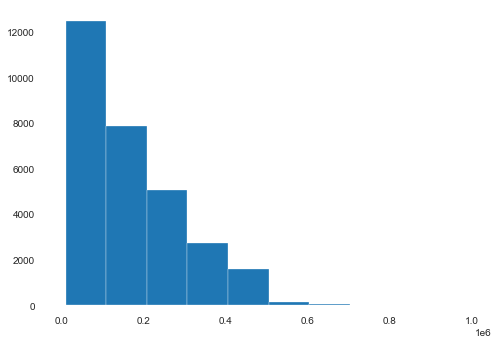

In [30]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

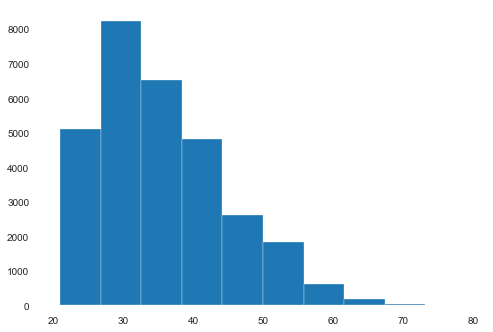

In [31]:
plt.hist(credit['AGE'])
plt.show()

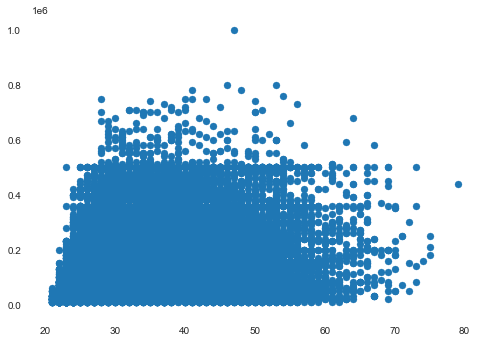

In [32]:
x = credit['AGE']
y = credit['LIMIT_BAL']
plt.scatter(x,y)
plt.show()

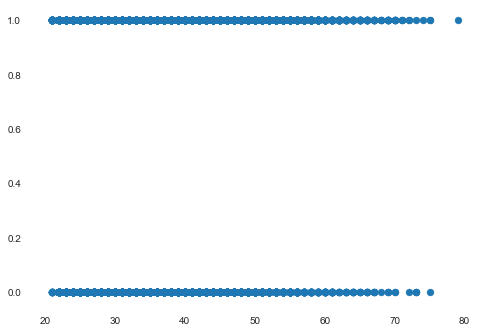

In [33]:
x1 = credit['AGE']
y1 = credit['default']
plt.scatter(x1,y1)
plt.show()

In [34]:
# The scatterplot shows relationship between two variables
# The scatter plot above shows relationship between Age and Whether they default or NOT.
# From above, customers of all age either default or not.  Age is not an influencing factor

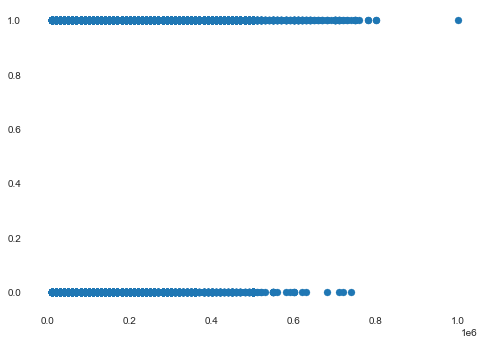

In [35]:
x2 = credit['LIMIT_BAL']
y2 = credit['default']
plt.scatter(x2,y2)
plt.show()

In [36]:
# Understanding the Data distribution above using 'DESCRIBE' function and Histograms above
# LIMIT_BAL (OUTPUT VARIABLE - Easier to predict a discretized value than an continuous variable)
# Mean=167K SD=130K and 75% of the distribution is lessthan 240K, so we can discretize the limit balance as follows
# 1 - 010,000 to 100,000
# 2 - 100,001 to 150,000
# 3 - 150,001 to 200,000 
# 4 - 200,001 to 250,000
# 5 - 250,001 to 300,000
# 6 - 300,001 to 500,000
# 7 - 500,001 to 1,000,000
#-------------------------------------------------------------------------
# AGE (INPUT VARIABLE)
# Discretization of AGE as input variable will help reduce the bias
# Mean=35, SD=9, 75% distribution of age is lessthan 41 years, so we can discretize the Age as follows
# 1 - 15 to 25
# 2 - 26 to 30
# 3 - 31 to 35
# 4 - 36 to 40
# 5 - 41 to 45
# 6 - 46 to 50
# 7 - 51 to 60
# 8 - 61 to 90
# --------------------------------------------------------------------------------------------------
# From the Pandas Profile Report - Look at the Warnings Tab information shown below
# BILL_AMT2 is highly correlated with BILL_AMT1 and 1 other fields	High Correlation
# BILL_AMT1 is highly correlated with BILL_AMT2	High Correlation
# BILL_AMT3 is highly correlated with BILL_AMT2 and 1 other fields	High Correlation
# BILL_AMT4 is highly correlated with BILL_AMT3 and 2 other fields	High Correlation
# BILL_AMT5 is highly correlated with BILL_AMT4 and 1 other fields	High Correlation
# BILL_AMT6 is highly correlated with BILL_AMT4 and 1 other fields	High Correlation
# Marriage_2 is highly correlated with Marriage_1	High Correlation
# Marriage_1 is highly correlated with Marriage_2
# PAY_0 has 23169 (77.3%) zeros	Zeros
# PAY_2 has 25528 (85.2%) zeros	Zeros
# PAY_3 has 25753 (85.9%) zeros	Zeros
# PAY_4 has 26456 (88.3%) zeros	Zeros
# PAY_5 has 26998 (90.1%) zeros	Zeros
# PAY_6 has 26887 (89.7%) zeros
# ------- Deduction based on the above -----------
# We can just keep one of the BILL_AMT and DROP rest of the BILL_AMTs. We will decide based on the correlation with LIMIT_BAL
# We can Keep Marriage_1 and drop Marriage_2
# PAY_X has many Zero values (meaning FULLY PAID or NOT UTILIZED or Using Revolving credit)
# We may just want to Keep PAY_0 and drop rest of the input variables
# Before we decide to drop let's look at the correlation between these variables with the Output variable as well as
# inter-relationship between them to find if they are co-linear so they can be dropped to remove bias.
# --------------------------------------------------------------------------------------------------

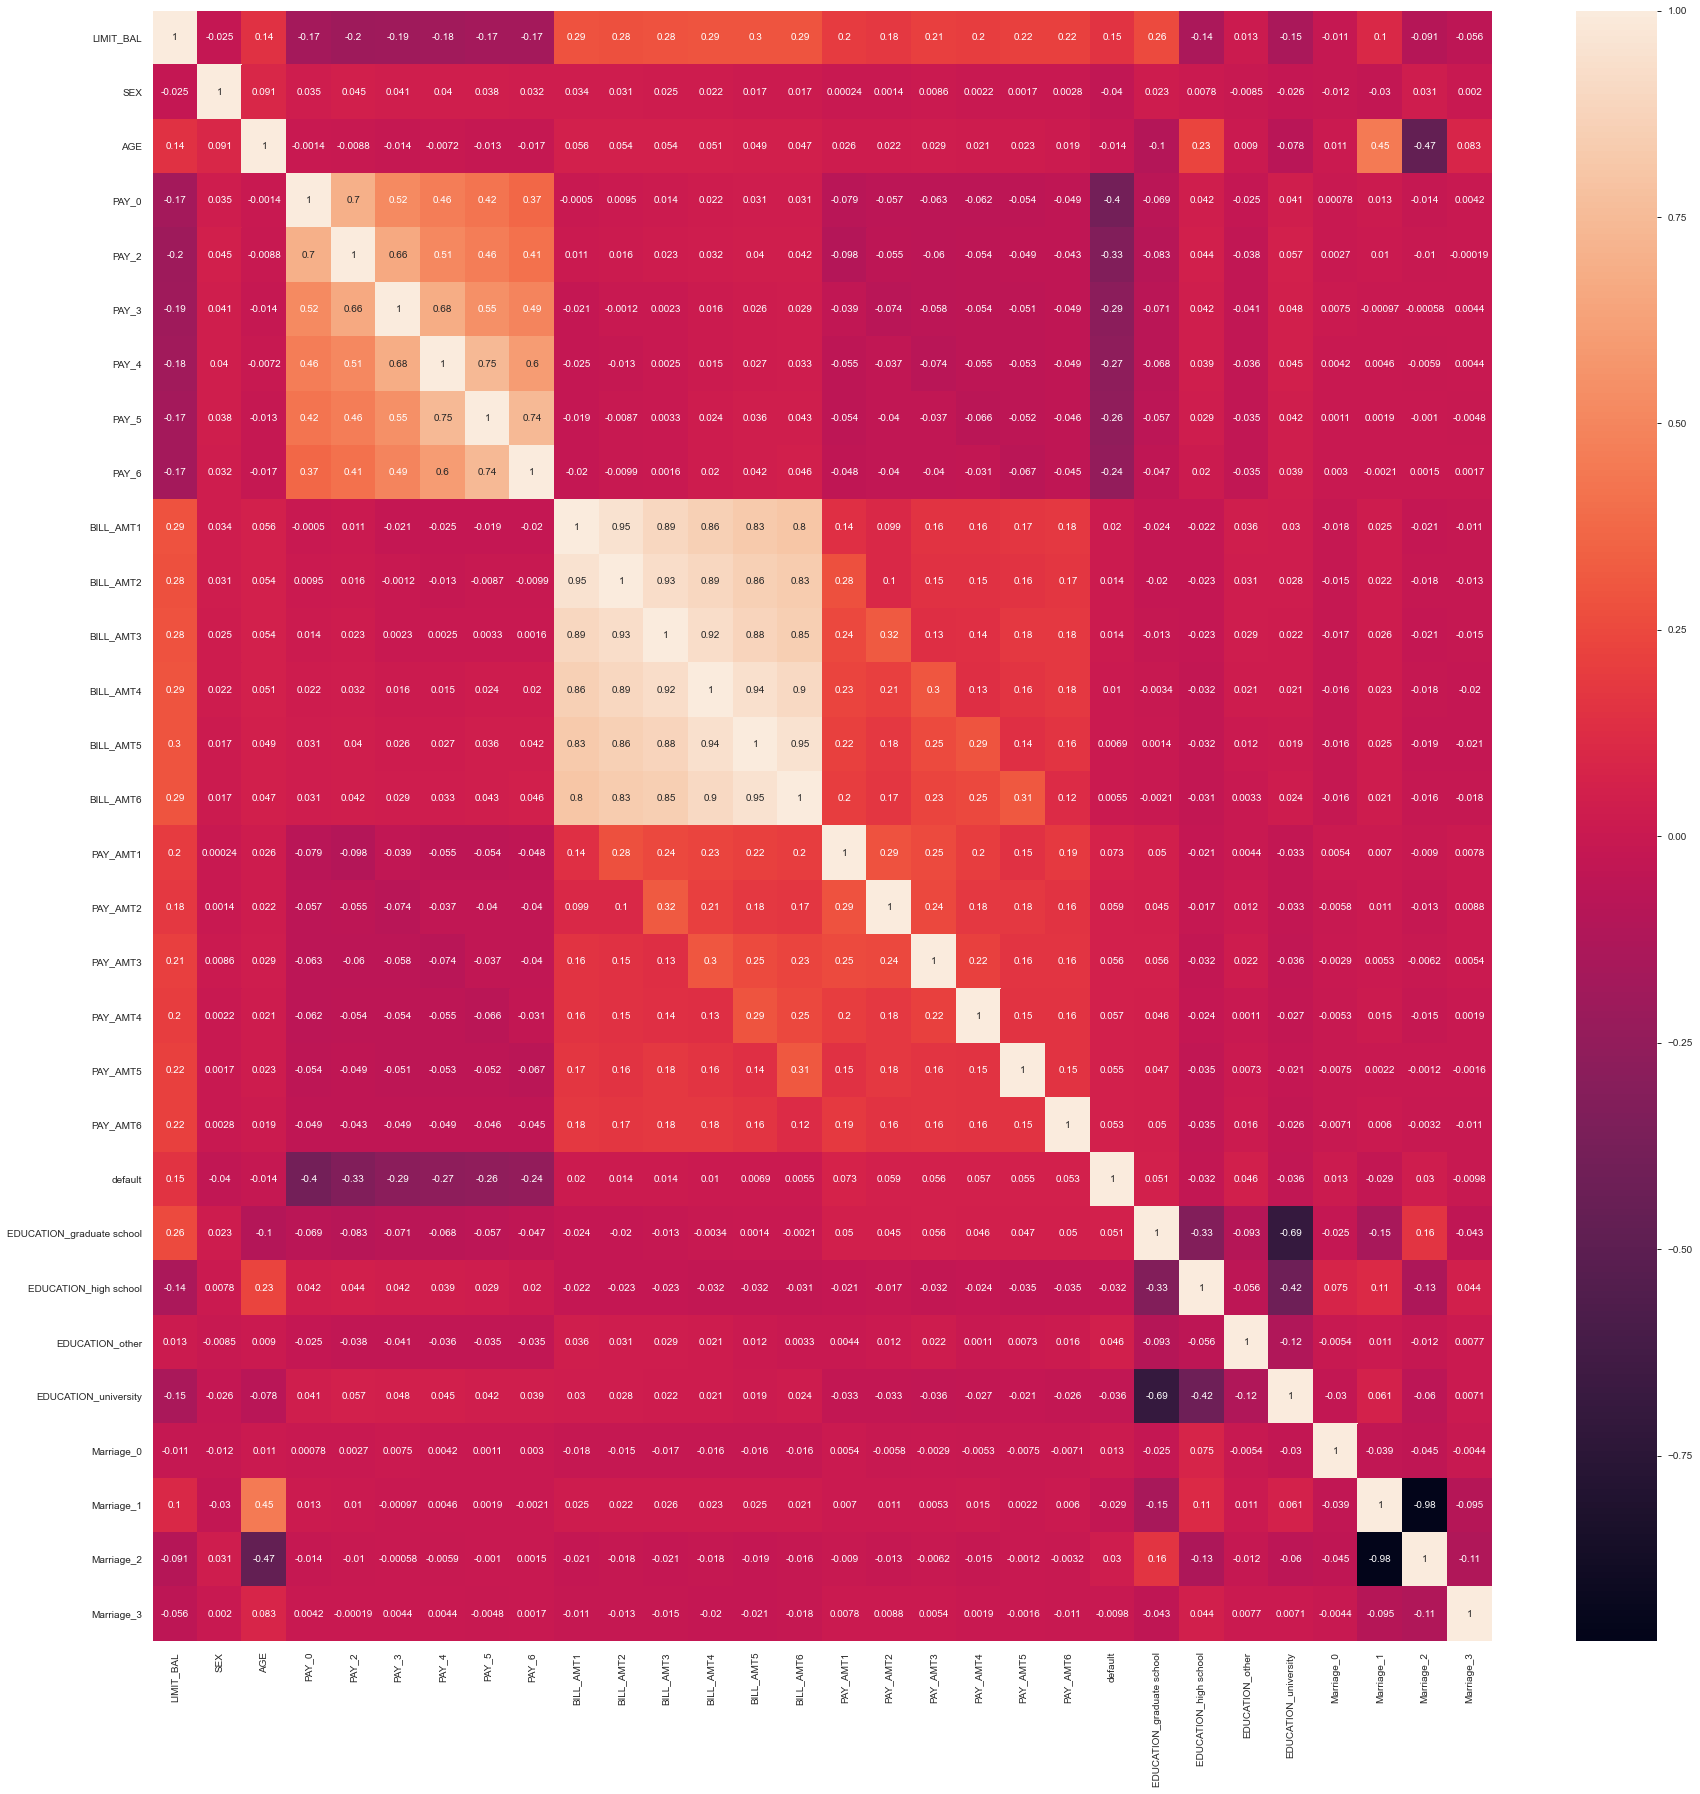

In [37]:
# Now Let's run the correlation matrix and see the relationship to the Limit_Balance before we do any discretization
import numpy
credit_corr = credit.corr()
plt.figure(figsize=(30,30))
sn.heatmap(credit_corr, annot=True)
plt.show()

In [38]:
# Continuing our data exploration activity based on the heatmap above ...
# SEX has -0.025 correlation to LIMIT_BAL, Hence we can drop SEX
# PAY_0 to PAY_6 has negative correlation with LIMIT_BAL, Hence we may drop them
# AGE has 0.14 correlation to LIMIT_BAL, though this is low we will keep it and evaluate it in the model with and without AGE
# We will retain BILL_AMT5 (with highest correlation (0.30) to LIMIT_BAL ) and remove other BILL_AMT
# EDUCATION_xx other than EDUCATION_graduate_school is less correlated to LIMIT_BAL so we may drop them and keep only EDUCATION_graudate_school
# Marriage_xx has low correlation to LIMIT_BAL and hence may be dropped.
# Based on the above, the following column may be dropped from the input variables to predict LIMIT_BAL discretized
credit = credit.drop(['SEX'], axis=1)
credit = credit.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1)
credit = credit.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT6'], axis=1)
credit = credit.drop(['EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university'], axis=1)
credit = credit.drop(['Marriage_0','Marriage_1', 'Marriage_2', 'Marriage_3' ], axis=1)

In [39]:
credit.describe()

,LIMIT_BAL,AGE,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school
count,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,35.487969,40358.334390,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.352511
std,129760.135222,9.219459,60817.130623,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.477760
min,10000.000000,21.000000,-81334.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,1787.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000
50%,140000.000000,34.000000,18130.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000
75%,240000.000000,41.000000,50247.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000
max,1000000.000000,79.000000,927171.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000
